In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

# Getting the Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Airline/train.csv')

In [4]:
# Take a look at the first few instances
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
print("The data shape is : {} ".format(df.shape))

The data shape is : (103904, 25) 


In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [8]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


We have 24 columns of data, some are categorical, one is float. Many contain discrete values between 0-5.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [10]:
# taking all columns which have categorical values

cols = df.select_dtypes(include = ['object'])
categorical_cols= cols.nunique(dropna=False)
print (categorical_cols)

Gender            2
Customer Type     2
Type of Travel    2
Class             3
satisfaction      2
dtype: int64


In [11]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

In [12]:
# Encode labels in column
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Customer Type']= label_encoder.fit_transform(df['Customer Type'])
df['Type of Travel']= label_encoder.fit_transform(df['Type of Travel'])
df['Class']= label_encoder.fit_transform(df['Class'])
df['satisfaction']= label_encoder.fit_transform(df['satisfaction'])
df['Gender'].unique()

array([1, 0])

In [13]:
ddata = pd.get_dummies(df, drop_first = True)
print("The data shape is : {} ".format(ddata.shape))
ddata.head()

The data shape is : (103904, 25) 


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [14]:
sb.pairplot(df.sample(1000), hue='satisfaction')

Output hidden; open in https://colab.research.google.com to view.

In [15]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

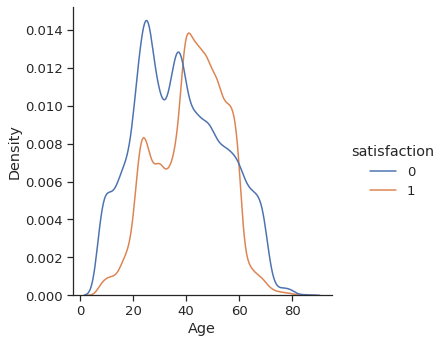

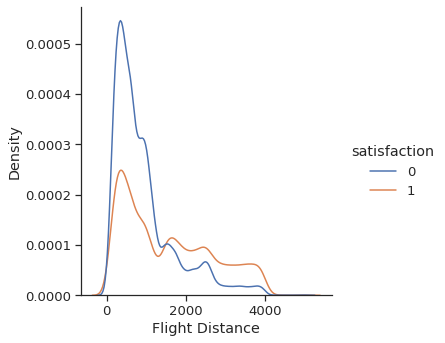

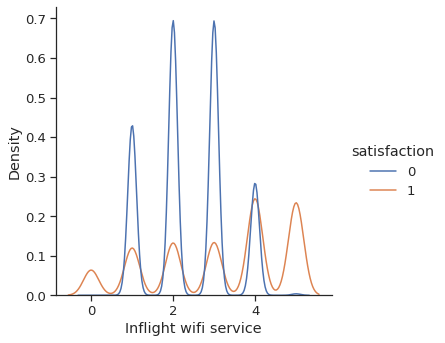

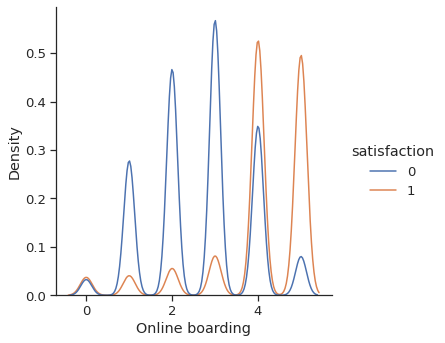

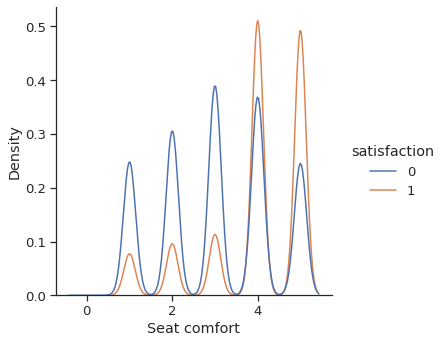

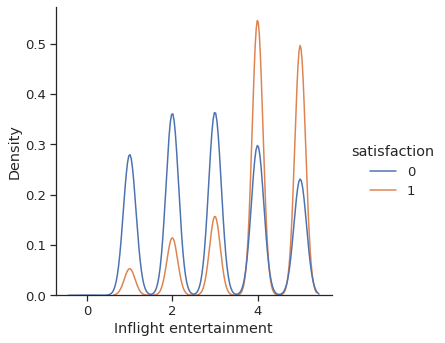

In [16]:
# taking the good features according to pairplot

features = ['Age', 'Flight Distance', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment']


sb.set(font_scale= 1.2)
sb.set_style('ticks')

for i, feature in enumerate(features):
    sb.displot(data=ddata, x=feature, kind='kde', hue='satisfaction')  
    
sb.despine()


# **Missing Data**
Next, we look at the data to find if anything is missing

In [17]:
print (df.isnull().sum())

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Correlation between departure and arrival delays:  0.9657824379838085


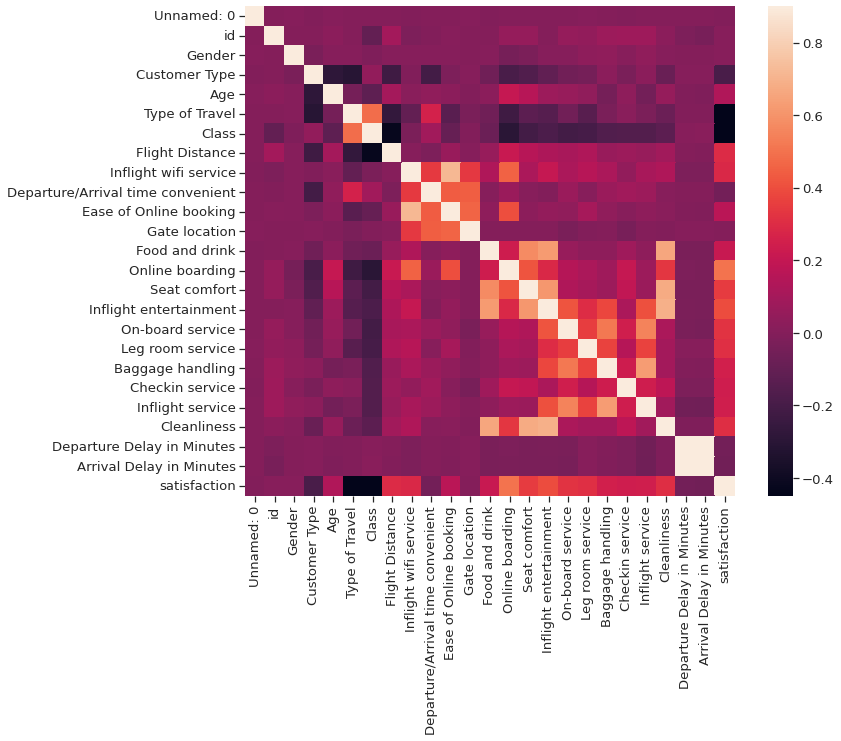

In [35]:
%matplotlib inline

corrmat = df.corr()
plt.subplots(figsize=(12,9))
sb.heatmap(corrmat, vmax=0.9, square=True)
print ('Correlation between departure and arrival delays: ', corrmat['Arrival Delay in Minutes']['Departure Delay in Minutes'])

It is very obvious that the two delays are highly correlated (see the two whitest cells off the diagonal), and indeed the correlation value is 0.965. We can therefore use the departure delay data to impute the missing arrival delay data

In [19]:
# Fix data by imputation
df['Arrival Delay in Minutes'].fillna(df['Departure Delay in Minutes'], inplace = True)
print (df.isnull().sum())

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


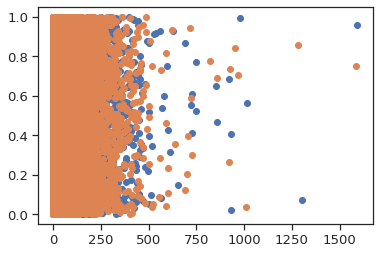

In [20]:
plt.scatter (df['Departure Delay in Minutes'], np.random.rand(df.shape[0]))
plt.scatter (df['Arrival Delay in Minutes'], np.random.rand(df.shape[0]))

only very few instances have a delay

Next - the flight distances.

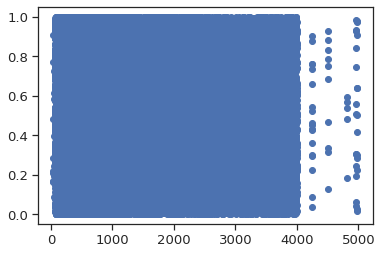

In [21]:
plt.scatter (ddata['Flight Distance'], np.random.rand(ddata.shape[0]))

In [36]:
#  spliting to training and test sets
from sklearn.model_selection import train_test_split

used_data = df.drop (['Unnamed: 0', 'satisfaction',], axis=1)
x = used_data.values 
y = df['satisfaction'].values

# Normalize the features
for feature in range (x.shape[1]):
    min = x[:,feature].min()
    max = x[:,feature].max()
    # x[:,feature] = (x[:,feature]-min) / (max-min)
    
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)
print("The training data size is : {} ".format(x_train.shape))
print("The test data size is : {} ".format(x_test.shape))

The training data size is : (83123, 23) 
The test data size is : (20781, 23) 


In [23]:
x

array([[5.40279799e-01, 1.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.57035176e-02, 1.13636364e-02],
       [3.88515464e-02, 1.00000000e+00, 1.00000000e+00, ...,
        2.00000000e-01, 6.28140704e-04, 3.78787879e-03],
       [8.47150040e-01, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.29908607e-01, 1.00000000e+00, 1.00000000e+00, ...,
        8.00000000e-01, 4.39698492e-03, 8.83838384e-03],
       [4.17095912e-01, 0.00000000e+00, 1.00000000e+00, ...,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00],
       [4.81725298e-01, 1.00000000e+00, 0.00000000e+00, ...,
        2.00000000e-01, 0.00000000e+00, 0.00000000e+00]])

In [24]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dct = DecisionTreeClassifier(max_depth=None)
dct.fit(x_train,y_train)
dct_training_score = 100*dct.score(x_train, y_train)
print ('Tree Depth:', dct.get_depth())
print ('Tree Leaves:', dct.get_n_leaves())
dct_test_score = 100*dct.score(x_test, y_test)
print("Decision Tree accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_training_score, dct_test_score))

Tree Depth: 36
Tree Leaves: 3034
Decision Tree accuracy. Train : 100.00%, Test: 94.64%. 


The decision tree has perfectly got trained by the training set. Moreover, it has more than 94% of the test set correct which means the data is trained properly.

It seems the tree has a similar training and test accuracy up to around depth 7 or 8, where a gap between training and test sets begin to develop (=overlearning). This means we can limit tree depth at 8 for future estimators. Next, let's look at the important features in the final tree:

In [25]:
# Get the more dependent tree features

features = used_data.columns
importances = dct.feature_importances_
leading_indices = (-importances).argsort()[:23] #decending order
print ("Leading features sorted by importance:")
for i in range (23):
    print (i+1, features[leading_indices[i]], round(100*importances[leading_indices[i]],2), '%')

Leading features sorted by importance:
1 Online boarding 36.37 %
2 Inflight wifi service 17.63 %
3 Type of Travel 14.61 %
4 Inflight entertainment 4.61 %
5 Customer Type 4.06 %
6 id 3.01 %
7 Checkin service 2.67 %
8 Class 2.11 %
9 Age 1.98 %
10 Flight Distance 1.86 %
11 Gate location 1.7 %
12 Baggage handling 1.54 %
13 Seat comfort 1.33 %
14 Inflight service 1.13 %
15 Cleanliness 1.0 %
16 Leg room service 0.87 %
17 Arrival Delay in Minutes 0.82 %
18 On-board service 0.76 %
19 Departure Delay in Minutes 0.58 %
20 Departure/Arrival time convenient 0.56 %
21 Food and drink 0.32 %
22 Ease of Online booking 0.31 %
23 Gender 0.17 %


As we can see the first three features are the more important features, we can work on them.

In [26]:
# Tree based on 3 best features

leading_x = ddata[['Online boarding', 'Inflight wifi service', 'Type of Travel']]
lx_train, lx_test, ly_train, ly_test = train_test_split (leading_x, y, test_size=0.2, random_state=42)

dct = DecisionTreeClassifier(max_depth=None)
dct.fit(lx_train,ly_train)
dct_training_score = 100*dct.score(lx_train, ly_train)
print ('Tree Depth on leading 3 parameters:', dct.get_depth())
print ('Tree Leaves using leading 3 parameters:', dct.get_n_leaves())
dct_test_score = 100*dct.score(lx_test, ly_test)
print("Decision Tree accuracy for leading 3 parameters. Train : {:.2f}%, Test: {:.2f}%. ".format(dct_training_score, dct_test_score))


Tree Depth on leading 3 parameters: 9
Tree Leaves using leading 3 parameters: 43
Decision Tree accuracy for leading 3 parameters. Train : 89.12%, Test: 89.15%. 


Trying with 100-200 estimators

In [27]:
from sklearn.ensemble import RandomForestClassifier
# Try 100 estimators
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
random_forest_training_score = 100*rfc.score(x_train,y_train)
random_forest_test_score = 100*rfc.score(x_test,y_test)
print("Random forest accuracy, 100 estimators. Train : {:.2f}%, Test: {:.2f}%. ".format(random_forest_training_score, random_forest_test_score))
# Try 200 estimators
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train,y_train)
random_forest_training_score = 100*rfc.score(x_train,y_train)
random_forest_test_score = 100*rfc.score(x_test,y_test)
print("Random forest accuracy, 200 estimators. Train : {:.2f}%, Test: {:.2f}%. ".format(random_forest_training_score, random_forest_test_score))

Random forest accuracy, 100 estimators. Train : 100.00%, Test: 96.37%. 
Random forest accuracy, 200 estimators. Train : 100.00%, Test: 96.45%. 


In [37]:
# K Nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit (x_train, y_train)
knn_training_score = 100*knn.score(x_train,y_train)
knn_test_score = 100*knn.score(x_test,y_test)
print("KNN accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(knn_training_score, knn_test_score))

KNN accuracy. Train : 77.80%, Test: 67.17%. 


In [38]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(max_iter=1000)
logr.fit (x_train, y_train)
logr_training_score = 100*logr.score(x_train,y_train)
logr_test_score = 100*logr.score(x_test,y_test)
print("Logistic Regression accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(logr_training_score, logr_test_score))

Logistic Regression accuracy. Train : 77.27%, Test: 77.46%. 


In [28]:
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Airline/test.csv")

In [29]:
val = pd.get_dummies(test, drop_first = True)
print("The data shape is : {} ".format(val.shape))
val.head()

The data shape is : (25976, 26) 


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0,19556,52,160,5,4,3,4,3,4,...,5,5,50,44.0,0,0,0,1,0,1
1,1,90035,36,2863,1,1,3,1,5,4,...,4,5,0,0.0,0,0,0,0,0,1
2,2,12360,20,192,2,0,2,4,2,2,...,2,2,0,0.0,1,1,0,1,0,0
3,3,77959,44,3377,0,0,0,2,3,4,...,1,4,0,6.0,1,0,0,0,0,1
4,4,36875,49,1182,2,3,4,3,4,1,...,2,4,0,20.0,0,0,0,1,0,1


In [30]:
print (val.isnull().sum())

Unnamed: 0                            0
id                                    0
Age                                   0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
Gender_Male                           0
Customer Type_disloyal Customer       0
Type of Travel_Personal Travel        0
Class_Eco                             0
Class_Eco Plus                        0


In [31]:
val['Arrival Delay in Minutes'].fillna(val['Departure Delay in Minutes'], inplace = True)
print (val.isnull().sum())

Unnamed: 0                           0
id                                   0
Age                                  0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Gender_Male                          0
Customer Type_disloyal Customer      0
Type of Travel_Personal Travel       0
Class_Eco                            0
Class_Eco Plus                       0
satisfaction_satisfied   

In [32]:
val.columns

Index(['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus',
       'satisfaction_satisfied'],
      dtype='object')

In [33]:
ddata.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [34]:
test_data = val.drop(['Unnamed: 0', 'satisfaction_satisfied','id'], axis=1)
x_val = test_data.values 
y_val = val['satisfaction_satisfied'].values


pred = DecisionTreeClassifier(max_depth=None)
pred.fit(x_train,y_train)
pred_training_score = 100*pred.score(x_train, y_train)
print ('Tree Depth:', pred.get_depth())
print ('Tree Leaves:', pred.get_n_leaves())
pred_test_score = 100*pred.score(x_val, y_val)

# print("The training data size is : {} ".format(x_train.shape))
# print("The test data size is : {} ".format(x_val.shape))

print("Decision Tree accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(pred_training_score, pred_test_score))

Tree Depth: 36
Tree Leaves: 3016
Decision Tree accuracy. Train : 100.00%, Test: 44.61%. 
